In this notebook, we use deep learning to find the best fitting polynomials to fit 4 points around a line. We’ll look at polynomials with degrees much bigger than the amount of data we have.

We create our target line using the function `testline`, which will be used to generate our training and testing data. We look at the line between `xfrom = -1` to `xto = 1`. Our test set, `testxs` has `ntestpoints + 1` examp,es, evenly spaced between `xfrom` and `xto`.

`testlabs` applies `testline` to `testxs` to get the test labels.

We plot the training points in blue and the test set line in green.


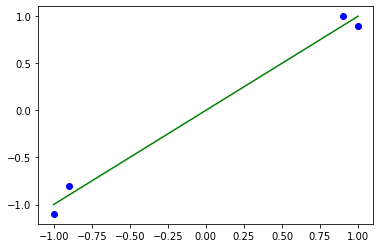

In [2]:
import numpy as np

# Our target linear function
def testline(x):
  return(x)

# We'll look at the function from xfrom to xto.
xfrom = -1
xto = 1

# We'll sample the real function with a resolution of ntestpoints
ntestpoints = 200
# testxs is the x positions sampled for the smooth function
testxs = np.array([xfrom + i/ntestpoints*(xto-xfrom) for i in range(ntestpoints+1)])

# The test data
testlabs = testline(testxs)

# a few testing coordinates
#trainxs = np.array([-.6,-.4,.4,.6])
trainxs = np.array([-1,-.9,.9,1.0])

# the labels plus a little perturbation
#trainlabs = testline(trainxs) + np.array([-.05,.05,-.05,.05])
trainlabs = testline(trainxs) + np.array([-.1,.1,.1,-.1])

# Here's what it looks like. The points are the training data
# The line is the test data.
import matplotlib.pyplot as plt
plt.plot(testxs,testlabs,color='green')
plt.plot(trainxs,trainlabs,'o',color="blue")

To feed the data to Keras, we expand the datapoints into a set of features consisting of powers of those values. The function `makefeatures`, returns a numpy array consisting of the input values raised to successive powers from 0 to `fitd`, inclusive.


We show an example using `makefeatures` applied to our `trainxs` expanding the features to a 4$^{th}$ degree polynomial. For each datapoint, x, the function returns:
 0. 1
 1. x 
 2. x$^2$
 3. x$^3$
 4. x$^4$

In [3]:
# Make a set of polynomial features for the given points
#  using degree fitd.
def makefeatures(xs, fitd):
  features = np.reshape(xs**0,(-1,1))
  for d in range(1,fitd+1):
    features = np.concatenate((features, np.reshape(xs**d,(-1,1))),1)
  return(features)

# Example data for fitting a 4th degree polynomial
makefeatures(trainxs, 4)

array([[ 1.    , -1.    ,  1.    , -1.    ,  1.    ],
       [ 1.    , -0.9   ,  0.81  , -0.729 ,  0.6561],
       [ 1.    ,  0.9   ,  0.81  ,  0.729 ,  0.6561],
       [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ]])

Now, we define a simple Keras network for fitting the data.

We import the Keras libraries we need to create a simple one-layer network. `Sequential` is for concatenating the layers. `Dense` is for making the one fully connected layer we need.

The function `fitplot` fits the data with a `d` degree polynomial. We run `makefeatures` to create training and testing data with the necessary features for our `d` degree polynomial. Then, we construct a `model` consisting of a single `Dense` layer with a `linear` `activation`. This is standard for polynomial regression. 

We `fit` the model, using `reg` as part of our optimization process for training. During training, we pass through the data `epochs=100000` times. That may seem like overkill, but the effect we’re looking for emerges in highly trained networks.

After the model is `fit`, we use it to make `trainpreds` and  `testpreds` predictions for the training and testing data. We `plot` the resulting fit in orange and compare it to the training and test data, returning the mean-squared error on the testing and training examples.

In [4]:
# import libraries for deep learning
!pip install keras=='2.3.1'
from keras.models import Sequential
from keras.layers import Dense
import keras.regularizers

# fit a degree d polynomial to the data, plot it
def fitplot(d,reg):
  # create polynomial features for the training and testing data
  traindat = makefeatures(trainxs, d)
  testdat = makefeatures(testxs, d)
  # make a simple one-layer network with linear activation and just a hint of regularization
  model = Sequential()
  model.add(Dense(1, input_dim=d+1, activation='linear',kernel_regularizer=keras.regularizers.l2(reg)))
#  model.add(Dense(1, input_dim=d+1, activation='linear'))
  # fit mean squared error with adam
  model.compile(loss='mean_squared_error', optimizer='adam')
  # Train to lower the loss as much as we can
  model.fit(traindat, trainlabs, epochs=100000,verbose=0)
  # predict training and testing data using learned model
  trainpreds = np.reshape(model.predict(traindat),-1)
  testpreds = np.reshape(model.predict(testdat),-1)
  plt.plot(testxs,testpreds,color='orange')
  plt.plot(testxs,testlabs,color='green')
  plt.plot(trainxs,trainlabs,'o',color='blue')
  return(sum((testpreds-testlabs)**2)/len(testpreds), sum((trainpreds-trainlabs)**2)/len(trainpreds))

Using TensorFlow backend.


Below is fitplot applied to our data where the degree of the polynomial is 0.

The mean square error for the training and test set are printed and the resulting line is plotted in orange.

In [1]:
fitplot(0,0)

NameError: ignored

Below is fitplot applied to our data where the degree of the polynomial is 1.

The mean square error for the training and test set are printed and the resulting line is plotted in orange.

(1.2725452930191774e-11, 0.010000000034355737)

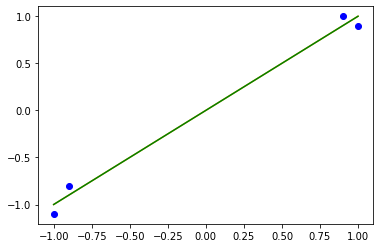

In [0]:
fitplot(1,0)

Below is fitplot applied to our data where the degree of the polynomial is 2.

The mean square error for the training and test set are printed and the resulting line is plotted in orange.

(0.45836155831848047, 1.258976567432836e-10)

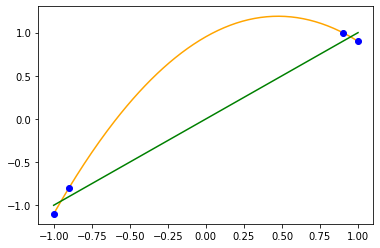

In [0]:
fitplot(2,0)

Below is fitplot applied to our data where the degree of the polynomial is 3.

The mean square error for the training and test set are printed and the resulting line is plotted in orange.

(0.45831393799117065, 2.872939894868284e-09)

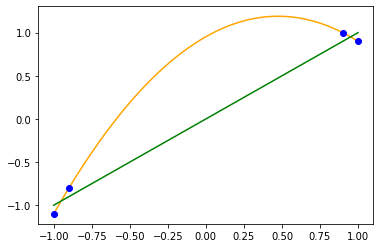

In [0]:
fitplot(3,0)

Below is fitplot applied to our data where the degree of the polynomial is 4.

The mean square error for the training and test set are printed and the resulting line is plotted in orange.

(0.09407098769362192, 4.6175575363487445e-10)

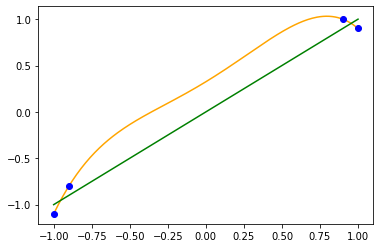

In [0]:
fitplot(4,0)

Below, we rerun `fitplot` 105 times, varying our optimizer parameter `rep` from 0 to 6 and our polynomical parameter `d` from 0 to 14.  We collect the resulting mean squared error for the train set in `trainerr` and for the test set in `testerr`. 

We then plot the resulting `trainerr` and `testerr` for all our runs and print their resulting values.


0 0


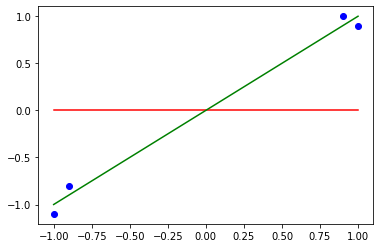

(0.33666666666666767, 0.9150000000000009)
0 1


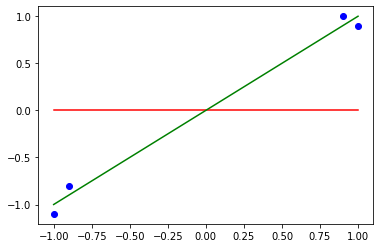

(0.33666667230695496, 0.9150000056402884)
0 2


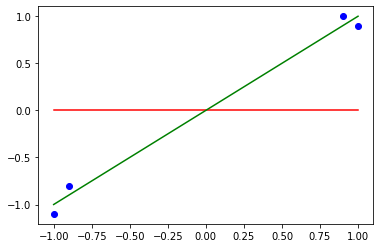

(0.33666666684333935, 0.915000000176673)
0 3


In [0]:
testerr = []
trainerr = []
#ds = range(2,40)
#ds = [30]
# ds = [7]
# nreps = 10
nreps = 1
d = 0
ds = []
for _ in range(15):
  for rep in range(7):
    print(d,rep)
    err = fitplot(d,0.00)
    plt.pause(1)
    print(err)
    testerr += [err[0]]
    trainerr += [err[1]]
    ds += [d]
  d += 1
#  plt.plot(allxs,preds,color='red')
#  plt.plot(allxs,cleanys,color='green')
#  plt.plot(xs,ys,'o',color='blue')
  plt.plot(ds,testerr,color='green')
  plt.plot(ds,trainerr,'blue')
  plt.pause(1)
  print(ds)
  print(testerr)
  print(trainerr)

Below are the `trainerr` and `testerr` results of a previous run. `ds` indicates the degree of the polynomial used in training at that run instance.

In [0]:
ds = [2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14]
trainerr = [0.4583630299368304, 0.45836184946843817, 0.4583819782449778, 0.45806281418275535, 0.45835485505394236, 0.45823448252954535, 0.45833719051075944, 0.4584817810720738, 0.4583591447012478, 0.4583608395398412, 0.4582030596453077, 0.45836202302155277, 0.45834206295562835, 0.4583614096394483, 0.3843250354086432, 0.14145360184436698, 0.31127298887055765, 0.11667382660988175, 0.2545241621578074, 0.24992224442459976, 0.27655315624461907, 0.2864450958094415, 0.3259530475930833, 0.3043719437270797, 0.23843194734184334, 0.12326579728331584, 0.3101944661912122, 0.23741913505959283, 0.18236369493586235, 0.014924746251656514, 0.19792434545046805, 0.3170412776208701, 0.12631170453785429, 0.037042042152711174, 0.06304431974245565, 0.09975070924407987, 0.05527843551871872, 0.13102809711635943, 0.16603626888882028, 0.056283773039269624, 0.03774621884992696, 0.4756811412830971, 0.0684909693997305, 0.11694094054478009, 0.18302257323377105, 0.0998533061175667, 0.1413664761793333, 0.0769263163600835, 0.0927856504170066, 0.05707724827813254, 0.02766970567838186, 0.047891231897658273, 0.20453556902413977, 0.04557545173657829, 0.12075076072653243, 0.07496431772638501, 0.06572515699632131, 0.04178806630506086, 0.07646128315345227, 0.16229233623515193, 0.10613707653010428, 0.027224918407660715, 0.04775247001669962, 0.26967571551403263, 0.19791323511349615, 0.11359987606468926, 0.024381067438177712, 0.018506218008524748, 0.11167110082954788, 0.05831316085788516, 0.06146585565161044, 0.20598777722528416, 0.2932338315960433, 0.23382751564584203, 0.0661055741506254, 0.01312531234605032, 0.0071550917212505095, 0.20238869348260466, 0.0560028987706038, 0.020822426555802524, 0.037972125022270195, 0.17992886532052613, 0.023171939906033247, 0.05615269397972715, 0.02184918265581866, 0.08634375619367887, 0.09249276172134815, 0.025343577692482668, 0.16824415551382843, 0.025595453295163093, 0.04553975771848554]
testerr = [6.781327499610573e-11, 1.7310739508833067e-11, 4.994168278938604e-10, 1.1332400703166344e-07, 6.289933907014653e-11, 2.029051767492845e-08, 8.793594830057041e-10, 1.7864841659339122e-08, 1.423870799010525e-11, 3.2638425294061054e-12, 4.3931059110490465e-08, 6.565556987185148e-12, 5.186027252071411e-10, 9.609198770095456e-11, 2.5234534461619834e-11, 8.52651283176818e-16, 1.0970266117770347e-09, 3.3095099638578615e-09, 4.504444959248458e-09, 1.2885582378989028e-10, 3.5068481453914164e-12, 6.258639473349697e-10, 4.910170048236373e-12, 2.9203093276430625e-11, 1.288356088395775e-12, 8.363005932238334e-10, 3.5765665983809e-11, 8.126827029999579e-08, 7.425171587634256e-15, 3.8724579088337545e-15, 2.625345027240385e-07, 3.3167679035270687e-07, 5.725851792687919e-11, 4.620983236945841e-08, 2.2678884192855514e-09, 1.2079226497333792e-15, 3.909011780889877e-11, 3.8724579088337545e-15, 6.936328986734066e-09, 8.52651283176818e-16, 3.8814555978194816e-08, 3.517186545585916e-15, 1.1628770977258695e-08, 2.2346569029331937e-14, 3.162397913313318e-08, 6.219518766645397e-10, 1.3820056205504691e-14, 4.5398493853304096e-11, 8.314202659927811e-12, 1.634127144700887e-10, 2.0542888279459665e-10, 3.197442300332539e-16, 4.618074598278063e-09, 7.425171581016811e-15, 1.0229780983197963e-07, 8.135714327364823e-15, 5.2935433783687214e-15, 5.566215577368023e-10, 4.1353587202973683e-14, 2.3590018815588624e-14, 2.359001882220607e-14, 6.004086114790566e-15, 6.53699316793413e-15, 2.3767654495558182e-14, 2.465583291856703e-14, 1.0356570086853846e-07, 3.334706377683994e-10, 4.850876287315889e-09, 3.6076528431018374e-11, 3.00397573487973e-11, 1.1510792312960876e-14, 2.9842794891336293e-15, 2.5345629239841052e-09, 1.2728660756529593e-08, 2.451372435990065e-15, 7.564213788686473e-10, 4.311303314338829e-11, 2.2087366389215767e-08, 2.3057111782297394e-14, 8.690152242275879e-10, 1.93399168324363e-08, 1.1155520943095593e-14, 3.2841463465165637e-07, 1.0977885273052202e-14, 2.0037305156640457e-14, 5.103462372346322e-07, 2.3476200183862127e-09, 1.096115198638033e-11, 7.850385191332027e-07, 8.135714317438656e-15, 7.247535907664698e-15]

ds = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] + ds
trainerr = [0.33666666667127104, 0.33666666666666767, 0.3366666666929426, 0.33666666666666767, 0.33666666666666767, 0.3366666666698639, 0.3366666666807676, 3.255470015397283e-10, 4.6226774746833086e-09, 1.6972362211025182e-12, 3.273183631257108e-13, 1.0436906133632544e-08, 3.2572286493178678e-15, 6.621659992026768e-12] + trainerr
testerr = [0.9150000000046044, 0.9150000000000009, 0.9150000000262759, 0.9150000000000009, 0.9150000000000009, 0.9150000000031976, 0.9150000000141008, 0.010000000328097657, 0.010000004632017367, 0.009999997022364903, 0.00999999702010289, 0.010000013420495755, 0.010000002980232701, 0.010000002988782663] + testerr

We print the list of polynomial degrees `ds` below.

In [0]:
ds

Finally, we plot the median training error for each `d` degree polynomial below.

In [0]:
drange = range(15)
trainbots = [min([trainerr[i] for i in range(len(trainerr)) if ds[i] == d]) for d in drange]
testbots = [min([testerr[i] for i in range(len(trainerr)) if ds[i] == d]) for d in drange]
traintops = [max([trainerr[i] for i in range(len(trainerr)) if ds[i] == d]) for d in drange]
testtops = [max([testerr[i] for i in range(len(trainerr)) if ds[i] == d]) for d in drange]
trainmids = [np.median([trainerr[i] for i in range(len(trainerr)) if ds[i] == d]) for d in drange]
testmids = [np.median([testerr[i] for i in range(len(trainerr)) if ds[i] == d]) for d in drange]

#named backwards?

plt.plot(drange,trainmids,color="green")
plt.plot(drange,testmids,color="blue")

#plt.fill_between(drange,testbots,testtops,color="green",alpha=0.5)
#plt.fill_between(drange,trainbots,traintops,color="blue",alpha=0.5)